In [ ]:
!pip install pycaret

In [2]:
#Import libraries/pkgs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# Data is available here: https://developers.google.com/public-data/docs/canonical/countries_csv

In [3]:
from google.colab import files
files.upload()

Saving countries.csv to countries.csv


{'countries.csv': b"country,latitude,longitude,name\r\nAD,42.546245,1.601554,Andorra\r\nAE,23.424076,53.847818,United Arab Emirates\r\nAF,33.93911,67.709953,Afghanistan\r\nAG,17.060816,-61.796428,Antigua and Barbuda\r\nAI,18.220554,-63.068615,Anguilla\r\nAL,41.153332,20.168331,Albania\r\nAM,40.069099,45.038189,Armenia\r\nAN,12.226079,-69.060087,Netherlands Antilles\r\nAO,-11.202692,17.873887,Angola\r\nAQ,-75.250973,-0.071389,Antarctica\r\nAR,-38.416097,-63.616672,Argentina\r\nAS,-14.270972,-170.132217,American Samoa\r\nAT,47.516231,14.550072,Austria\r\nAU,-25.274398,133.775136,Australia\r\nAW,12.52111,-69.968338,Aruba\r\nAZ,40.143105,47.576927,Azerbaijan\r\nBA,43.915886,17.679076,Bosnia and Herzegovina\r\nBB,13.193887,-59.543198,Barbados\r\nBD,23.684994,90.356331,Bangladesh\r\nBE,50.503887,4.469936,Belgium\r\nBF,12.238333,-1.561593,Burkina Faso\r\nBG,42.733883,25.48583,Bulgaria\r\nBH,25.930414,50.637772,Bahrain\r\nBI,-3.373056,29.918886,Burundi\r\nBJ,9.30769,2.315834,Benin\r\nBM,32.321

In [4]:
#load data
data = pd.read_csv("countries.csv")

In [5]:
data

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [7]:
#check missing value
data.isna().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64


#Initial preprocessing


In [48]:
def preprocess_inputs(df):
  df = df.copy()
  #Drop rows with missing value
  df= df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
  return df

In [9]:
data_copy = preprocess_inputs(data)

In [49]:
data_copy

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [12]:
data_copy.isna().sum()

country      0
latitude     0
longitude    0
name         0
dtype: int64

In [13]:
#import pycaret clustering pkg
import pycaret.clustering as pc

In [14]:
#exploring clustering pkg
dir(pc)

['Any',
 'Dict',
 'Display',
 'List',
 'MLUsecase',
 'Optional',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_metric',
 'assign_model',
 'create_model',
 'datetime',
 'deploy_model',
 'enable_colab',
 'evaluate_model',
 'get_clusters',
 'get_config',
 'get_logger',
 'get_logs',
 'get_metrics',
 'ipw',
 'is_in_colab',
 'load_config',
 'load_model',
 'models',
 'np',
 'pd',
 'plot_model',
 'predict_model',
 'pull',
 'pycaret',
 'remove_metric',
 'save_config',
 'save_model',
 'set_config',
 'setup',
 'sys',
 'time',
 'tune_model',
 'warnings']

In [15]:
#init Setup
setup = pc.setup(
    data = data_copy,
    ignore_features = ['country', 'name'],
    )

,Description,Value
0,session_id,4820
1,Original Data,"(243, 4)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(243, 2)"
9,CPU Jobs,-1


In [16]:
model = pc.create_model('kmeans', num_clusters=7)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4651,420.0013,0.667,0,0,0


As we got few metrics after creating the model. 
## 1. Silhouette: 

**The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).** The silhouette ranges from *−1 to +1*, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

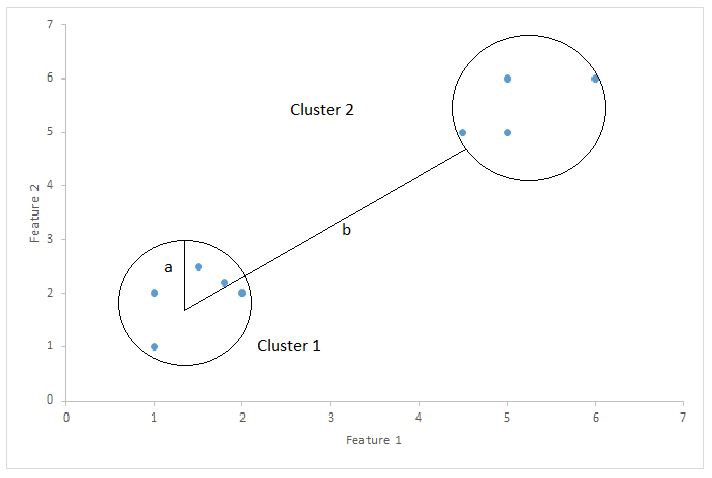


## 2. The Calinski-Harabasz Index:

The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

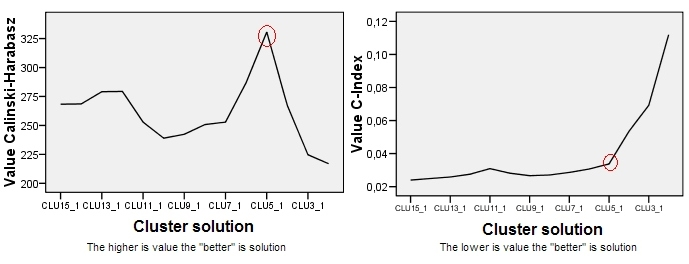

## 3. Davies Bouldein:
Davies-Bouldin index is a validation metric that is often used in order to evaluate the optimal number of clusters to use. It is defined as a ratio between the cluster scatter and the cluster’s separation and a lower value will mean that the clustering is better.

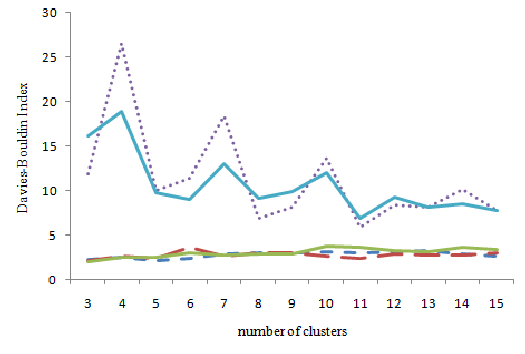

# Plot the elbow map to find out the optimal clusters

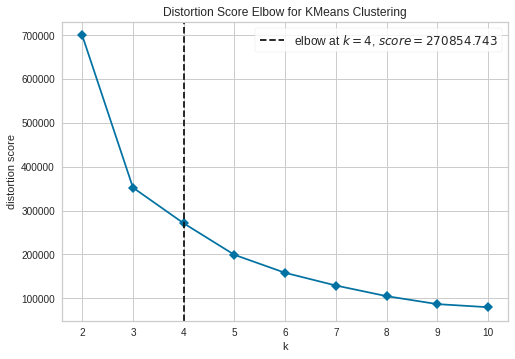

In [17]:
pc.plot_model(model, plot='elbow')

### It shows the optimal number of clusters are 4 but as we already know there are 7 continents in the world. But for other problems, elbow method is crucial to find out the optimal clusters.

#### let's plot other derived metrics as were given above in the markdown

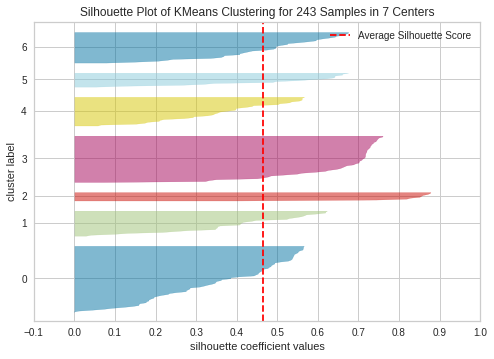

In [18]:
# 1. Silhouette:
pc.plot_model(model, plot='silhouette')

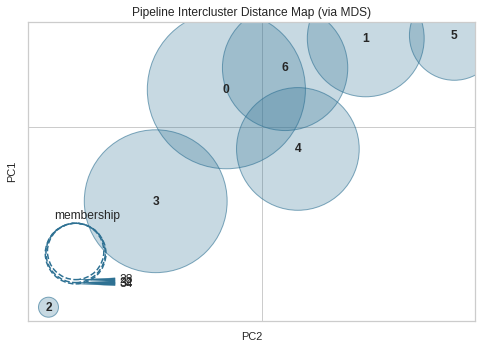

In [19]:
#Distance plot
pc.plot_model(model, plot='distance')

## Assign our clusters to their respective data points

In [20]:
model_data = pc.assign_model(model)

In [21]:
model_data.head(10)

,country,latitude,longitude,name,Cluster
0,AD,42.546245,1.601554,Andorra,Cluster 0
1,AE,23.424076,53.847818,United Arab Emirates,Cluster 6
2,AF,33.939110,67.709953,Afghanistan,Cluster 6
3,AG,17.060816,-61.796428,Antigua and Barbuda,Cluster 3
4,AI,18.220554,-63.068615,Anguilla,Cluster 3
5,AL,41.153332,20.168331,Albania,Cluster 0
6,AM,40.069099,45.038189,Armenia,Cluster 6
7,AN,12.226079,-69.060087,Netherlands Antilles,Cluster 3
8,AO,-11.202692,17.873887,Angola,Cluster 4
9,AQ,-75.250973,-0.071389,Antarctica,Cluster 4


## Plotting data points

In [22]:
#convert Cluster column to numerical format to plot the scatter plots
def postprocess_inputs(df):
  df = df.copy()
  df['Cluster'] = df['Cluster'].str.replace('Cluster', '').apply(int)
  return df

In [23]:
cluster_data_points = postprocess_inputs(model_data)

In [24]:
cluster_data_points

,country,latitude,longitude,name,Cluster
0,AD,42.546245,1.601554,Andorra,0
1,AE,23.424076,53.847818,United Arab Emirates,6
2,AF,33.939110,67.709953,Afghanistan,6
3,AG,17.060816,-61.796428,Antigua and Barbuda,3
4,AI,18.220554,-63.068615,Anguilla,3
...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,6
241,YT,-12.827500,45.166244,Mayotte,4
242,ZA,-30.559482,22.937506,South Africa,4
243,ZM,-13.133897,27.849332,Zambia,4


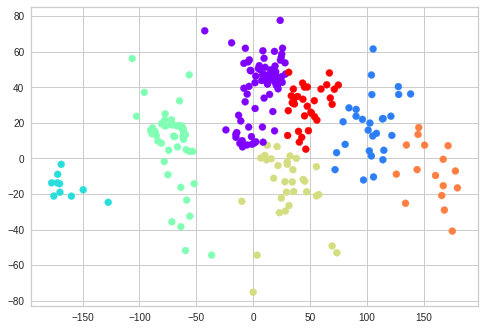

In [25]:
plt.scatter(cluster_data_points['longitude'], cluster_data_points['latitude'], c=cluster_data_points['Cluster'], cmap='rainbow')

# Plotting the same on World's Map using Geopandas

In [26]:
#install geopandas
!pip install geopandas

     |████████████████████████████████| 1.0MB 23.7MB/s 
     |████████████████████████████████| 15.3MB 330kB/s 
     |████████████████████████████████| 6.5MB 22.7MB/s 


In [33]:
import geopandas as gpd
import descartes

In [28]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_vectorized',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_feather',
 'read_file',
 'read_parquet',
 'read_postgis',
 'show_versions',
 'sindex',
 'sjoin',
 'tools']

In [29]:
geo_data = gpd.GeoDataFrame(cluster_data_points,
                            geometry=gpd.points_from_xy(cluster_data_points['longitude'],
                                                        cluster_data_points['latitude']))

In [30]:
geo_data

,country,latitude,longitude,name,Cluster,geometry
0,AD,42.546245,1.601554,Andorra,0,POINT (1.60155 42.54624)
1,AE,23.424076,53.847818,United Arab Emirates,6,POINT (53.84782 23.42408)
2,AF,33.939110,67.709953,Afghanistan,6,POINT (67.70995 33.93911)
3,AG,17.060816,-61.796428,Antigua and Barbuda,3,POINT (-61.79643 17.06082)
4,AI,18.220554,-63.068615,Anguilla,3,POINT (-63.06862 18.22055)
...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,6,POINT (48.51639 15.55273)
241,YT,-12.827500,45.166244,Mayotte,4,POINT (45.16624 -12.82750)
242,ZA,-30.559482,22.937506,South Africa,4,POINT (22.93751 -30.55948)
243,ZM,-13.133897,27.849332,Zambia,4,POINT (27.84933 -13.13390)


In [36]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

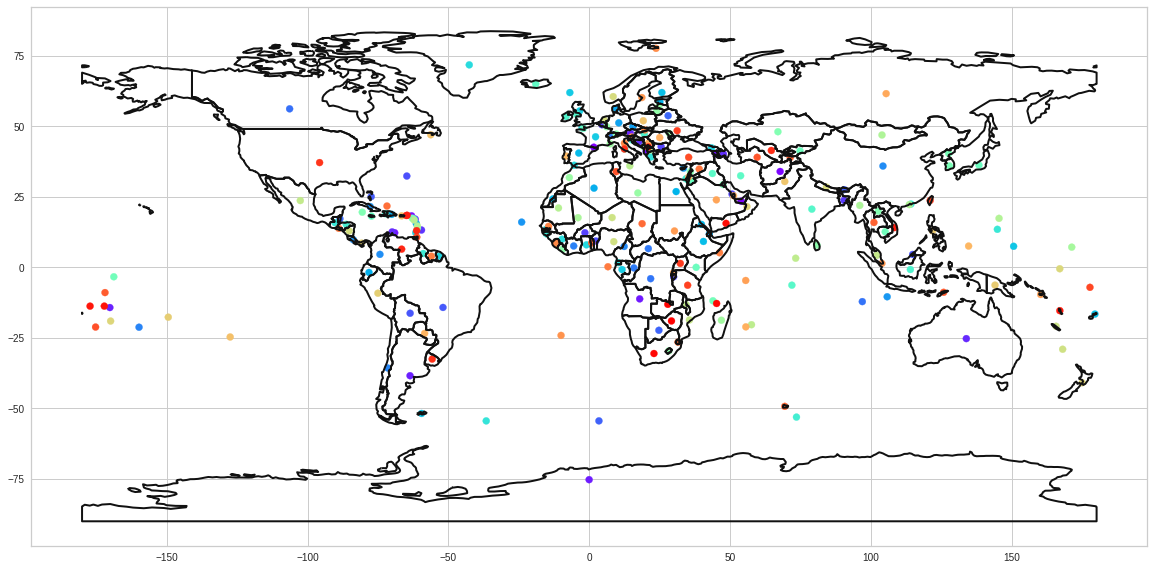

In [37]:
fig, ax = plt.subplots(figsize=(20,10))
geo_data.plot(cmap='rainbow', ax = ax)
world.geometry.boundary.plot(color=None, edgeColor='k', linewidth=2, ax=ax)

#Do a simple prediction now

In [38]:
model_data

,country,latitude,longitude,name,Cluster
0,AD,42.546245,1.601554,Andorra,Cluster 0
1,AE,23.424076,53.847818,United Arab Emirates,Cluster 6
2,AF,33.939110,67.709953,Afghanistan,Cluster 6
3,AG,17.060816,-61.796428,Antigua and Barbuda,Cluster 3
4,AI,18.220554,-63.068615,Anguilla,Cluster 3
...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,Cluster 6
241,YT,-12.827500,45.166244,Mayotte,Cluster 4
242,ZA,-30.559482,22.937506,South Africa,Cluster 4
243,ZM,-13.133897,27.849332,Zambia,Cluster 4


In [41]:
test_data = pd.DataFrame([{'latitude':22.5726, 'longitude':88.3639}, {'latitude':40.7128, 'longitude':74.0060}])

In [42]:
test_data

,latitude,longitude
0,22.5726,88.3639
1,40.7128,74.0060


#### We have given Kolkata, India and NY, USA co-ordinates to test it out.

In [43]:
#Make preeiction
predict_cluster = pc.predict_model(model, data=test_data)

In [44]:
predict_cluster

,latitude,longitude,Cluster
0,22.5726,88.3639,Cluster 1
1,40.7128,74.0060,Cluster 6


In [46]:
model_data[model_data['Cluster'] == 'Cluster 1']

,country,latitude,longitude,name,Cluster
18,BD,23.684994,90.356331,Bangladesh,Cluster 1
26,BN,4.535277,114.727669,Brunei,Cluster 1
30,BT,27.514162,90.433601,Bhutan,Cluster 1
36,CC,-12.164165,96.870956,Cocos [Keeling] Islands,Cluster 1
45,CN,35.861660,104.195397,China,Cluster 1
50,CX,-10.447525,105.690449,Christmas Island,Cluster 1
92,HK,22.396428,114.109497,Hong Kong,Cluster 1
98,ID,-0.789275,113.921327,Indonesia,Cluster 1
102,IN,20.593684,78.962880,India,Cluster 1
103,IO,-6.343194,71.876519,British Indian Ocean Territory,Cluster 1


#So Kolkata is in India that is in Cluster 1 so it is correctly identified.

In [47]:
model_data[model_data['Cluster'] == 'Cluster 6']

,country,latitude,longitude,name,Cluster
1,AE,23.424076,53.847818,United Arab Emirates,Cluster 6
2,AF,33.939110,67.709953,Afghanistan,Cluster 6
6,AM,40.069099,45.038189,Armenia,Cluster 6
15,AZ,40.143105,47.576927,Azerbaijan,Cluster 6
22,BH,25.930414,50.637772,Bahrain,Cluster 6
51,CY,35.126413,33.429859,Cyprus,Cluster 6
54,DJ,11.825138,42.590275,Djibouti,Cluster 6
61,EG,26.820553,30.802498,Egypt,Cluster 6
63,ER,15.179384,39.782334,Eritrea,Cluster 6
65,ET,9.145000,40.489673,Ethiopia,Cluster 6


# Cluster 6 shown for NY that is a false prediction.